In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape
#614 rows and 13 columns 

(614, 13)

In [6]:
df.tail()
#last bottom value


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
df.columns
#column name 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.duplicated().sum()
#no duplicated value in dataset

0

In [10]:
df.isnull().sum()
#they are null value in some data set very less so will trest them 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
df.info()
#In loan application status dataset we have 614 rows with 13 columns including target variable.
#Target Variable is 'Loan_Status' having object datatype and It is categorical variable.
#Gender, Married, Education,Self Employed, Credit History, Loan Status are categorical features.
#three types of datatype dtypes: float64(4), int64(1), object(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.describe().T
# Applicantincome column and it is left skewed
#coapplicantincome column and it is left skewed
#loan amount is right skewed 
#there are some extreme value are there. Loan_Amount_term is the year
#assuming that credit history 1 is good and 0 is not good
#Minimum Applicant income is 150 and maximum is 81000.

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [17]:
df.select_dtypes(include='object').describe()

#Male applying loan is higher than female
#65% people are married who appiled for loan
#68% applicants' application are accepted.
#79% people are graduate and 38% people belong to semiurban area.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [20]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
#method for filling null values from mode and median method


In [21]:
df.isnull().sum()
# nu null value now evrything has been treated

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

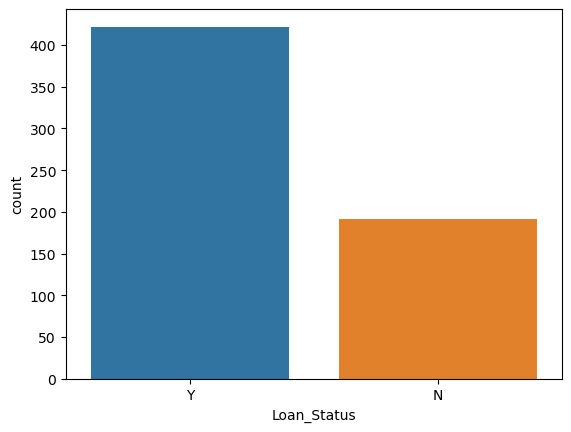

In [22]:
sns.countplot(df['Loan_Status'])
#its inbalance data we have to treat as huge gap in Y and N

In [23]:
def check_values(x):
    for i in x.columns:
        print(x[i].value_counts(),"\n")

In [24]:
check_values(df.iloc[:,1::].select_dtypes(include ="object"))
#from the depandents column, we observe that individual has applied for loan is more, may their income is enough for loan acceptance.

Male      502
Female    112
Name: Gender, dtype: int64 

Yes    401
No     213
Name: Married, dtype: int64 

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     532
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



<AxesSubplot:xlabel='Loan_Status,Gender,Education,Credit_History'>

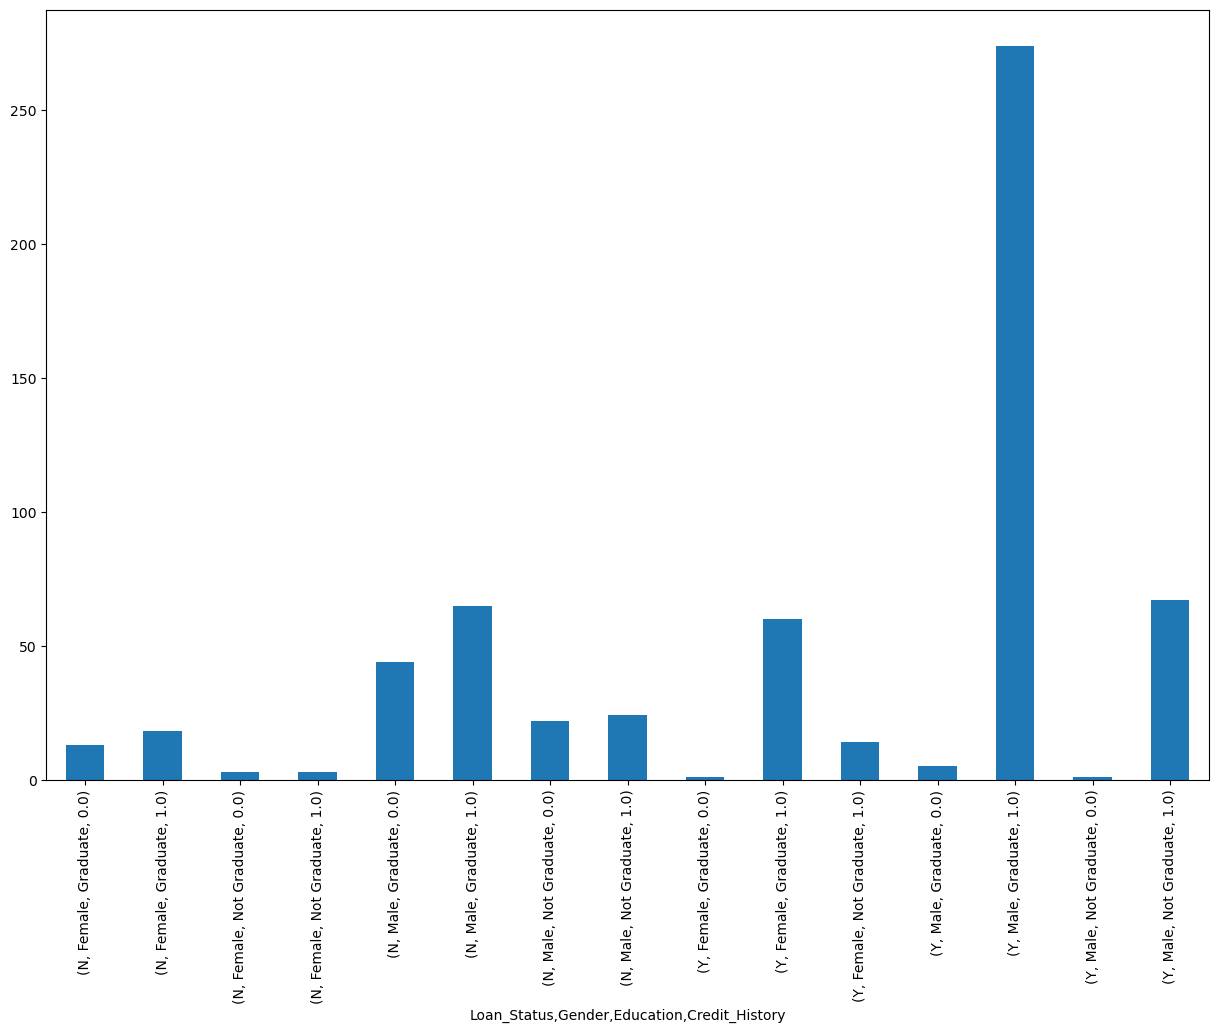

In [28]:
plt.figure(figsize=(15,10))
df.groupby(["Loan_Status","Gender","Education","Credit_History"])['Loan_Status'].count().plot(kind='bar')

In [29]:
#maximum participation has come from people who are graduate
#graduate people with good credit history have higher loan application

In [30]:
df.groupby('Education')['ApplicantIncome'].mean()
#salary of Graduate  &   Not Graduate        

Education
Graduate        5857.433333
Not Graduate    3777.283582
Name: ApplicantIncome, dtype: float64

In [31]:
df.groupby(["Education","Dependents"])['ApplicantIncome','CoapplicantIncome','LoanAmount'].mean()

#graduate are earning more than not graduate
# 3+ dependents loan amount is high under gradate 
# under non graduate bucket it is 115

ApplicantIncome  CoapplicantIncome  LoanAmount
Education    Dependents                                                
Graduate     0               5200.234266        1696.315105  140.454545
             1               6562.333333        1332.987654  163.024691
             2               5360.597403        1781.516883  159.610390
             3+             10555.166667        2613.694444  219.250000
Not Graduate 0               3879.162162        1232.040541  115.527027
             1               3647.761905        1785.904762  135.809524
             2               3534.958333        1384.791667  117.333333
             3+              3843.733333         609.800000  114.466667

In [32]:
df.groupby(["Education","Dependents"])[['CoapplicantIncome']].count()
#89% co applicant are male

CoapplicantIncome
Education    Dependents                   
Graduate     0                         286
             1                          81
             2                          77
             3+                         36
Not Graduate 0                          74
             1                          21
             2                          24
             3+                         15

In [33]:
df.groupby(["Married","Gender"])['ApplicantIncome','CoapplicantIncome'].mean()

ApplicantIncome  CoapplicantIncome
Married Gender                                    
No      Female      4503.787500        1020.012500
        Male        5251.045113        1494.932331
Yes     Female      4992.687500        1328.000000
        Male        5689.067751        1822.552629

In [35]:
df.groupby(["Self_Employed","Gender"])[['ApplicantIncome','LoanAmount']].mean()
#self_employed female are earning more than male

ApplicantIncome  LoanAmount
Self_Employed Gender                             
No            Female      3966.257732  120.402062
              Male        5351.195402  146.760920
Yes           Female      9022.800000  167.666667
              Male        7013.208955  171.000000

In [36]:
df.groupby(["Self_Employed","Married"])[['ApplicantIncome','LoanAmount','CoapplicantIncome','Loan_Amount_Term']].mean()

ApplicantIncome  LoanAmount  CoapplicantIncome  \
Self_Employed Married                                                   
No            No           4509.459459  124.270270        1449.956757   
              Yes          5412.815562  151.383285        1740.901787   
Yes           No           8015.785714  159.142857         435.178571   
              Yes          7051.574074  176.222222        2054.166667   

                       Loan_Amount_Term  
Self_Employed Married                    
No            No             351.632432  
              Yes            338.801153  
Yes           No             349.285714  
              Yes            330.444444

In [37]:
df.groupby(['Property_Area'])[['ApplicantIncome','LoanAmount']].mean()
#self employed and but no Married are earning more than self employed and married.
#self_employed and married earning less than self_employed but no Married have taken more loan by adding co applicant and average repayment duartion is 27.5 years

,ApplicantIncome,LoanAmount
Property_Area,,
Rural,5554.083799,151.446927
Semiurban,5292.261803,145.128755
Urban,5398.247525,141.425743


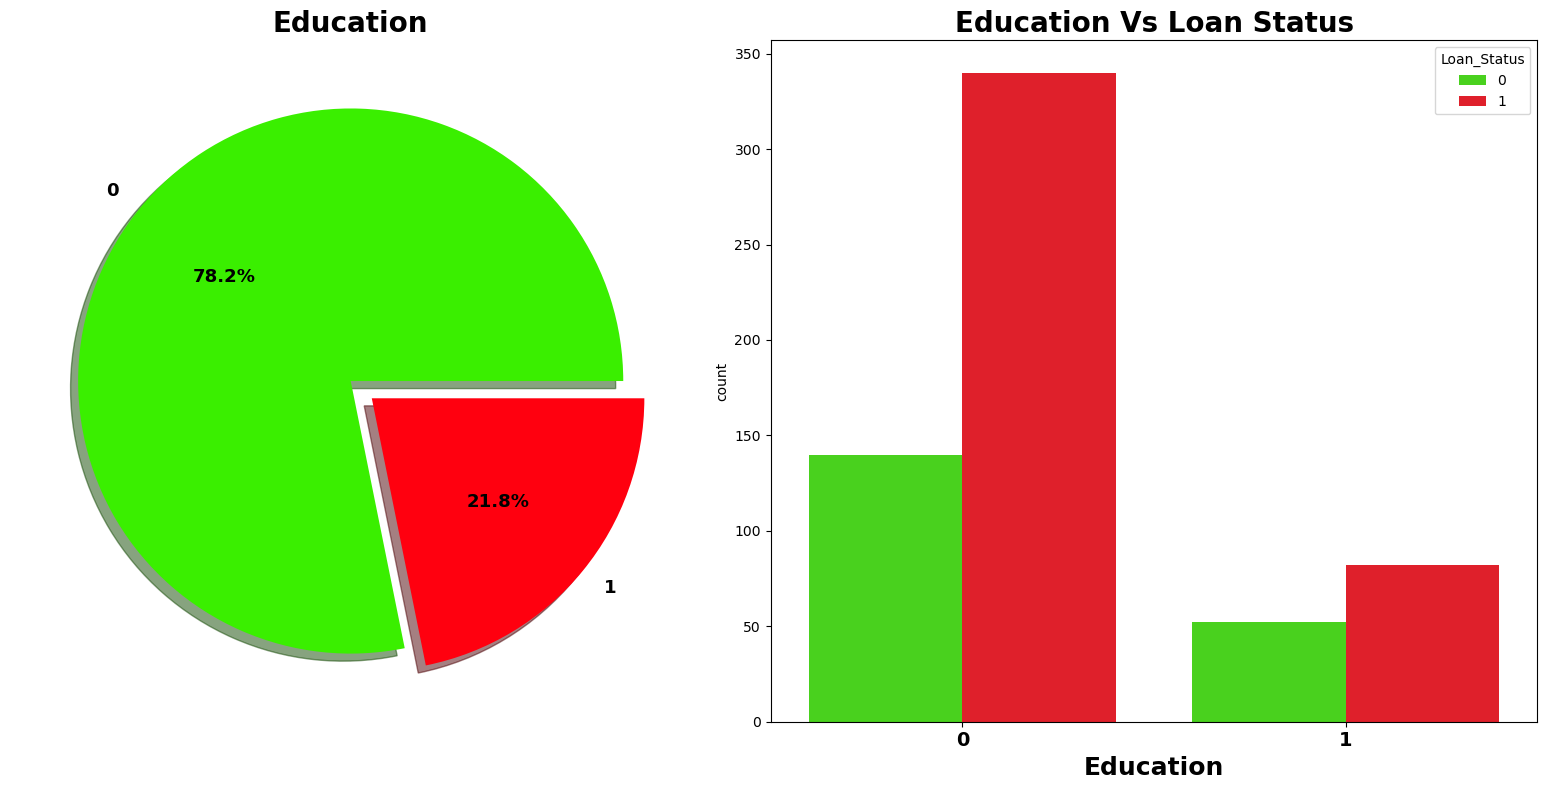

In [78]:

f,ax=plt.subplots(1,2,figsize=(16,8))
df['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Education', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Education',hue="Loan_Status",data=df,ax=ax[1])
ax[1].set_title('Education Vs Loan Status',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Education",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

In [38]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [41]:

Category=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

In [42]:

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


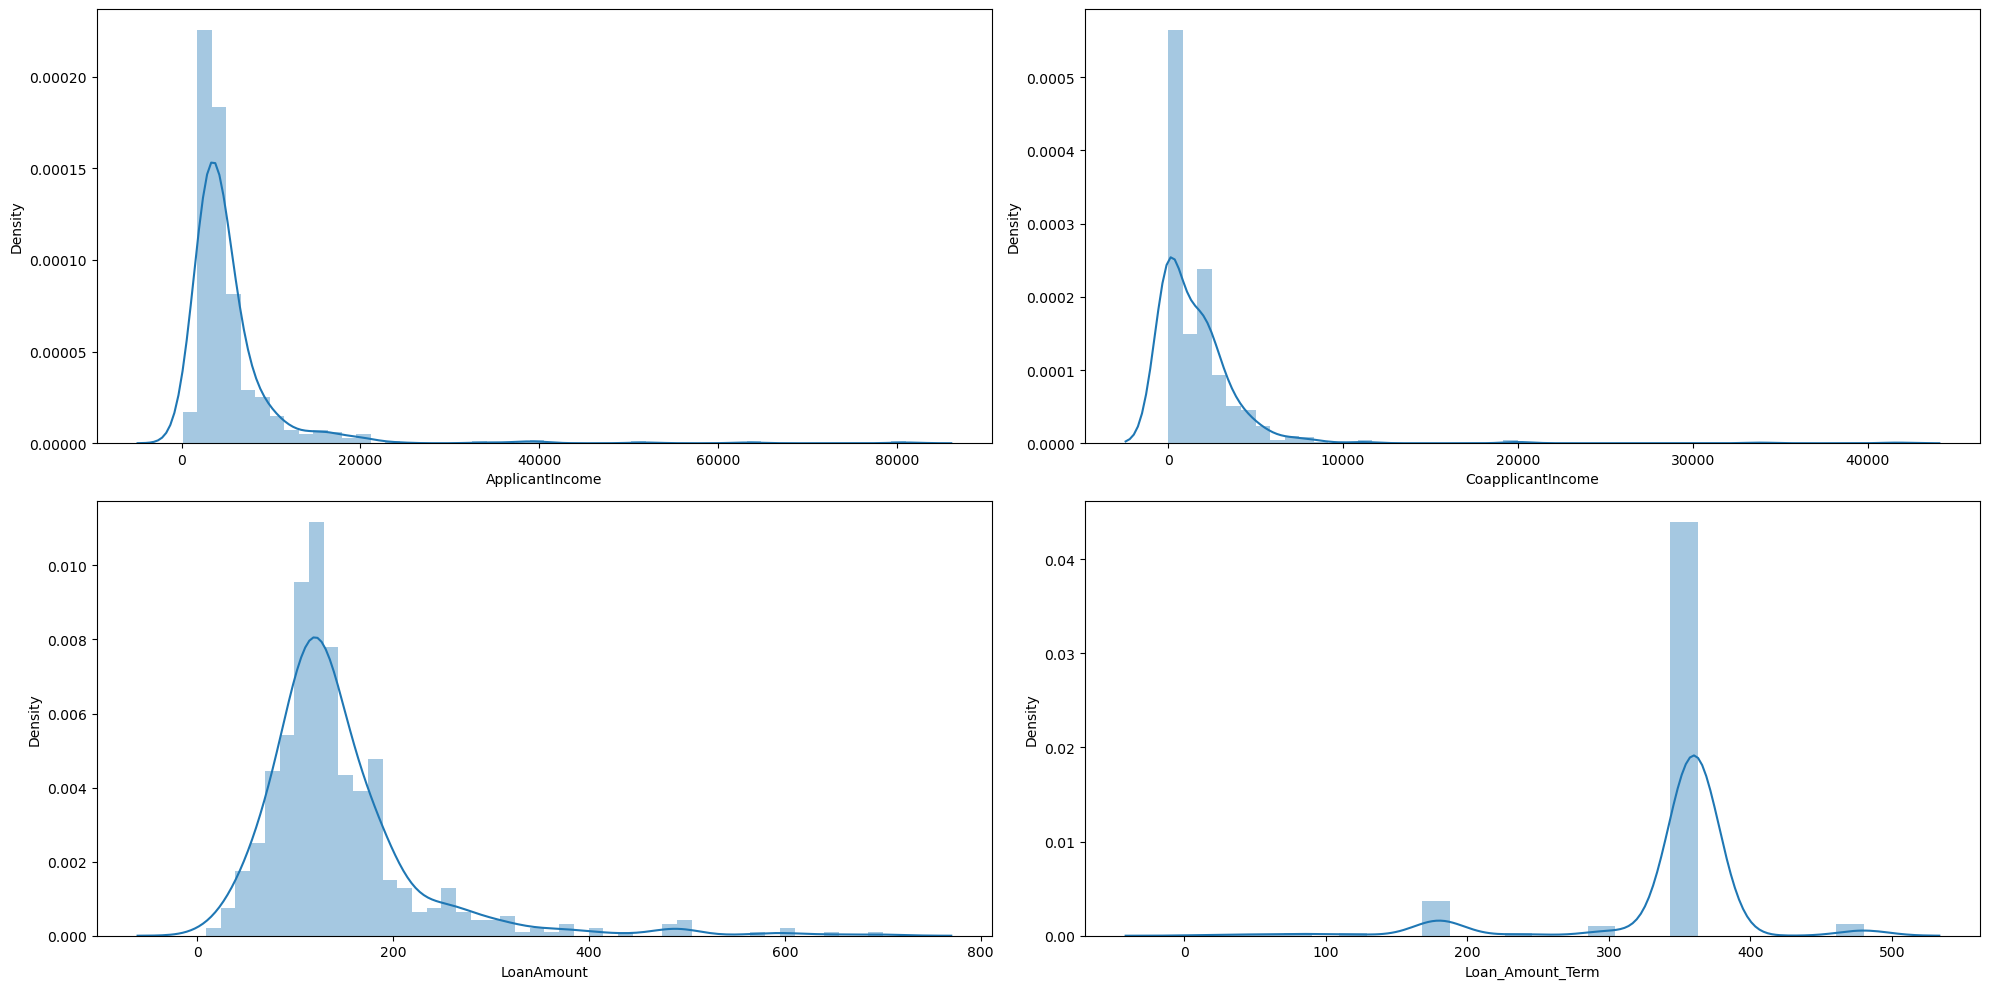

In [47]:
Numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
plt.figure(figsize=(20,10))
plotnumber = 1

for column in Numerical:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)

        
        
    plotnumber+=1
plt.tight_layout()

#will trest the skewness 

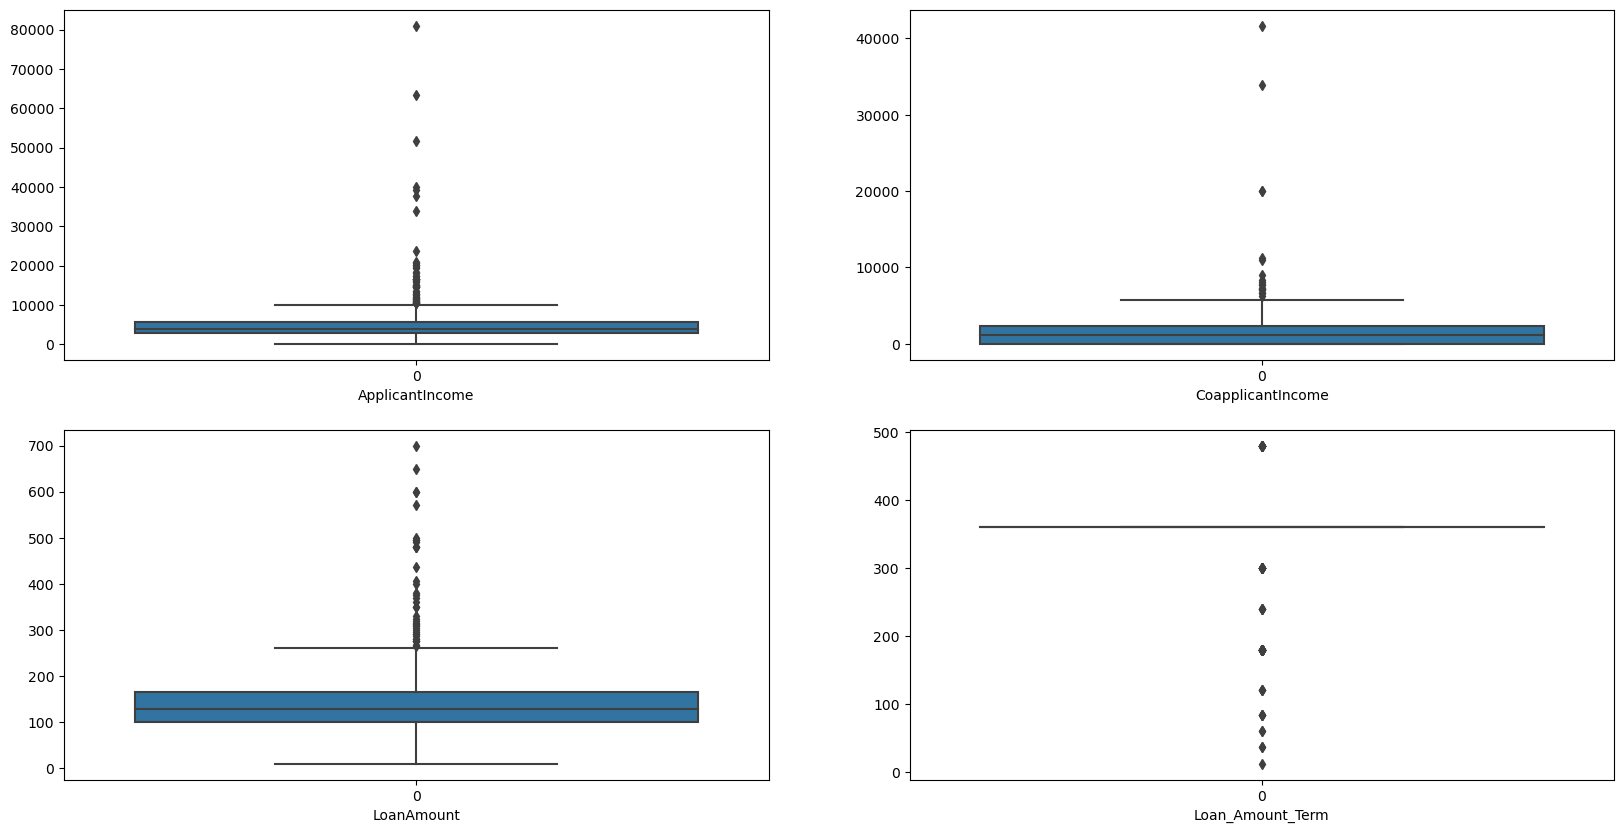

In [48]:
plt.figure(figsize=(20,10))

plotnumber = 1

for c in Numerical:
    if plotnumber <=5:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
        
    plotnumber+=1
    
#From Boxplot we can see outliers exist dataset.

In [56]:
df['Dependents'] =pd.to_numeric(df['Dependents'])
df['Dependents'] =pd.to_numeric(df['Dependents'])
# removing + sign from dependant column

In [57]:

from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]
#outlier removing method 

In [58]:
df1.shape
#after removing ouliers

(577, 12)

In [59]:
df.shape
#before removing ouliers

(614, 12)

In [84]:
df1.skew()
#Out of all above feature 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' are skewed which are numerical feature.
#Other features are categorical in nature so skewness is nothing to do with these remaining feature.We will ignore them.

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [85]:
df1['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df1['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df1['LoanAmount'] = np.sqrt(df['LoanAmount'])
#Skewness removoal from np.sqrt method 

In [86]:
df1.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      1.208613
CoapplicantIncome    0.207591
LoanAmount           0.359495
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [87]:
df1.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.043888,0.223579,0.169132,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.015274,0.301532,0.178289,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.095908,-0.015384,0.133323,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.177608,0.010786,-0.135408,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.238668,-0.068739,0.118771,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.043888,-0.015274,0.095908,-0.177608,0.238668,1.000000,-0.317194,0.447455,-0.061761,0.035231,-0.010953,-0.005287
CoapplicantIncome,0.223579,0.301532,-0.015384,0.010786,-0.068739,-0.317194,1.000000,0.256937,-0.025922,-0.002648,-0.087549,0.064145
LoanAmount,0.169132,0.178289,0.133323,-0.135408,0.118771,0.447455,0.256937,1.000000,0.046741,0.000282,-0.093267,-0.025614
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.061761,-0.025922,0.046741,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.035231,-0.002648,0.000282,0.027392,1.000000,-0.008121,0.560936


<AxesSubplot:>

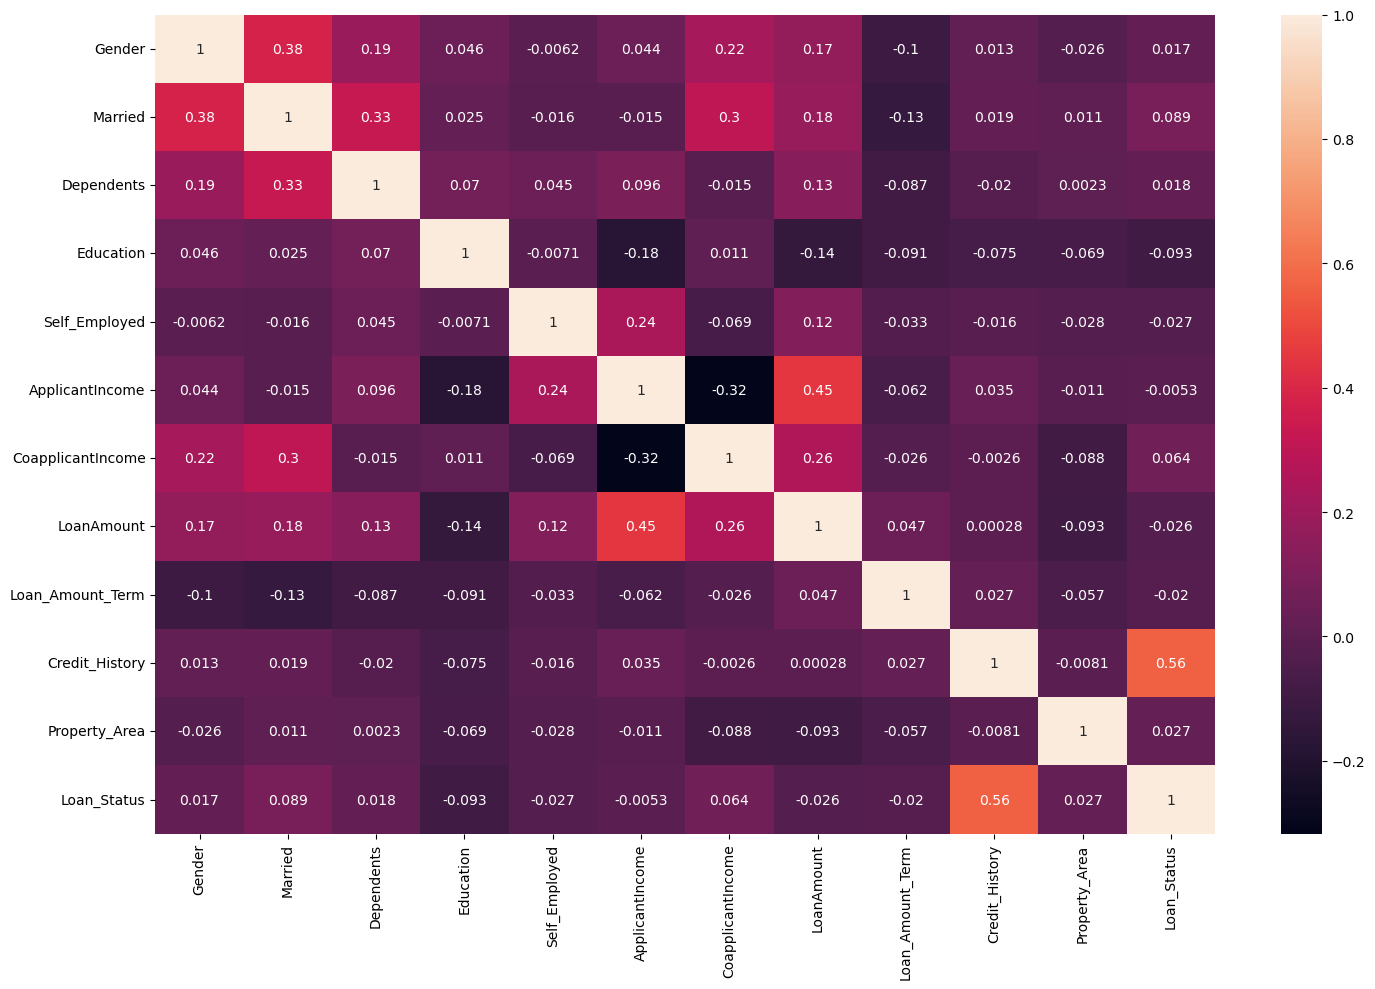

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True)

#looking at the correlation plot, only Credit_History is the only feature which is adding value to target variable

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif
#All features VIF is within permissible limit of 10.

,VIF,Features
0,6.404887,Gender
1,3.962922,Married
2,1.789119,Dependents
3,1.308821,Education
4,1.218266,Self_Employed
5,21.928101,ApplicantIncome
6,3.327546,CoapplicantIncome
7,39.037466,LoanAmount
8,21.459216,Loan_Amount_Term
9,9.630688,Credit_History


In [90]:

df1.Loan_Status.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [91]:
from imblearn.over_sampling import SMOTE

In [94]:
x = df1.drop('Loan_Status',axis=1)
y =df1['Loan_Status']
# Splitting data in target and dependent feature

In [95]:
oversample=SMOTE()
x, y = oversample.fit_resample(x,y)

In [96]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [97]:
#We have successfully resolved the class imbalanced problem and now all the categories have same data ensuring that the ML model does not get biased towards one category.

In [99]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [100]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [105]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [106]:
#creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[0.58656266, 0.41343734],
       [0.61084608, 0.38915392],
       [0.37458337, 0.62541663],
       [0.09576522, 0.90423478],
       [0.22989588, 0.77010412],
       [0.82601287, 0.17398713],
       [0.40316044, 0.59683956],
       [0.9215541 , 0.0784459 ],
       [0.25660229, 0.74339771],
       [0.23051471, 0.76948529],
       [0.30036482, 0.69963518],
       [0.57446417, 0.42553583],
       [0.95787277, 0.04212723],
       [0.31534695, 0.68465305],
       [0.29562993, 0.70437007],
       [0.97877973, 0.02122027],
       [0.95949091, 0.04050909],
       [0.29084672, 0.70915328],
       [0.23644218, 0.76355782],
       [0.31726094, 0.68273906],
       [0.82237441, 0.17762559],
       [0.38007842, 0.61992158],
       [0.9255675 , 0.0744325 ],
       [0.18917279, 0.81082721],
       [0.94743786, 0.05256214],
       [0.53625538, 0.46374462],
       [0.32013539, 0.67986461],
       [0.28102865, 0.71897135],
       [0.69291998, 0.30708002],
       [0.5145419 , 0.4854581 ],
       [0.

In [107]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score76.89%
============testresult===============
accuracy_score 80.62%
              precision    recall  f1-score   support

           0       0.87      0.66      0.75        70
           1       0.78      0.92      0.84        90

    accuracy                           0.81       160
   macro avg       0.82      0.79      0.80       160
weighted avg       0.82      0.81      0.80       160



In [108]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 76.76572327044026


In [109]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)
y_pred

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [110]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 78.75%
              precision    recall  f1-score   support

           0       0.78      0.71      0.75        70
           1       0.79      0.84      0.82        90

    accuracy                           0.79       160
   macro avg       0.79      0.78      0.78       160
weighted avg       0.79      0.79      0.79       160



In [111]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 78.65015723270442


In [112]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [113]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [114]:
d_t = DecisionTreeClassifier(criterion= 'entropy', max_depth= 12,max_leaf_nodes=5 ,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=5,
                       min_samples_leaf=4, min_samples_split=3)

In [115]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score78.30%
============testresult===============
accuracy_score 83.12%
              precision    recall  f1-score   support

           0       1.00      0.61      0.76        70
           1       0.77      1.00      0.87        90

    accuracy                           0.83       160
   macro avg       0.88      0.81      0.82       160
weighted avg       0.87      0.83      0.82       160



In [116]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0])

In [117]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 83.12%
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        70
           1       0.81      0.92      0.86        90

    accuracy                           0.83       160
   macro avg       0.84      0.82      0.82       160
weighted avg       0.84      0.83      0.83       160



In [118]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 83.67924528301887


In [119]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [120]:
    #time to train the data for best paraam and get best out of it
    grid.fit(x_train,y_train)
    best = grid.best_params_
    best

{'criterion': 'entropy',
 'max_depth': 12,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [121]:
RF = RandomForestClassifier(criterion= 'entropy', max_depth= 12,max_leaf_nodes=5 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(criterion='entropy', max_depth=12, max_leaf_nodes=5,
                       min_samples_leaf=4, min_samples_split=3)

In [122]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score80.03%
============testresult===============
accuracy_score 85.00%
              precision    recall  f1-score   support

           0       0.98      0.67      0.80        70
           1       0.79      0.99      0.88        90

    accuracy                           0.85       160
   macro avg       0.89      0.83      0.84       160
weighted avg       0.88      0.85      0.84       160



In [148]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=15)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with hence done ith that

array([[0.58656266, 0.41343734],
       [0.61084608, 0.38915392],
       [0.37458337, 0.62541663],
       [0.09576522, 0.90423478],
       [0.22989588, 0.77010412],
       [0.82601287, 0.17398713],
       [0.40316044, 0.59683956],
       [0.9215541 , 0.0784459 ],
       [0.25660229, 0.74339771],
       [0.23051471, 0.76948529],
       [0.30036482, 0.69963518],
       [0.57446417, 0.42553583],
       [0.95787277, 0.04212723],
       [0.31534695, 0.68465305],
       [0.29562993, 0.70437007],
       [0.97877973, 0.02122027],
       [0.95949091, 0.04050909],
       [0.29084672, 0.70915328],
       [0.23644218, 0.76355782],
       [0.31726094, 0.68273906],
       [0.82237441, 0.17762559],
       [0.38007842, 0.61992158],
       [0.9255675 , 0.0744325 ],
       [0.18917279, 0.81082721],
       [0.94743786, 0.05256214],
       [0.53625538, 0.46374462],
       [0.32013539, 0.67986461],
       [0.28102865, 0.71897135],
       [0.69291998, 0.30708002],
       [0.5145419 , 0.4854581 ],
       [0.

In [149]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score70.91%
============testresult===============
accuracy_score 63.12%
              precision    recall  f1-score   support

           0       0.56      0.70      0.62        70
           1       0.71      0.58      0.64        90

    accuracy                           0.63       160
   macro avg       0.64      0.64      0.63       160
weighted avg       0.65      0.63      0.63       160



In [150]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 64.8246855345912


In [151]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [152]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 3)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [153]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 74.38%
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        70
           1       0.82      0.70      0.75        90

    accuracy                           0.74       160
   macro avg       0.75      0.75      0.74       160
weighted avg       0.76      0.74      0.74       160

============trainresult===============
accuracy_score86.32%


In [154]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[0.66697222, 0.33302778],
       [0.44017636, 0.55982364],
       [0.23891886, 0.76108114],
       [0.06635078, 0.93364922],
       [0.16524493, 0.83475507],
       [0.97956842, 0.02043158],
       [0.21682808, 0.78317192],
       [0.95032179, 0.04967821],
       [0.16524493, 0.83475507],
       [0.54213067, 0.45786933],
       [0.34005617, 0.65994383],
       [0.54388332, 0.45611668],
       [0.99127392, 0.00872608],
       [0.07310037, 0.92689963],
       [0.27674186, 0.72325814],
       [0.9929099 , 0.0070901 ],
       [0.98080534, 0.01919466],
       [0.17355197, 0.82644803],
       [0.25392963, 0.74607037],
       [0.24341814, 0.75658186],
       [0.97002642, 0.02997358],
       [0.3490321 , 0.6509679 ],
       [0.90051884, 0.09948116],
       [0.38581867, 0.61418133],
       [0.97653747, 0.02346253],
       [0.74718363, 0.25281637],
       [0.98011684, 0.01988316],
       [0.11541041, 0.88458959],
       [0.97099773, 0.02900227],
       [0.30911086, 0.69088914],
       [0.

In [155]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifir

============trainresult===============
accuracy_score90.88%
============testresult===============
accuracy_score 85.00%
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        70
           1       0.82      0.93      0.87        90

    accuracy                           0.85       160
   macro avg       0.86      0.84      0.84       160
weighted avg       0.86      0.85      0.85       160



In [156]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0])

In [157]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 


============trainresult===============
accuracy_score54.25%
============testresult===============
accuracy_score 48.12%
              precision    recall  f1-score   support

           0       0.45      0.83      0.58        70
           1       0.61      0.21      0.31        90

    accuracy                           0.48       160
   macro avg       0.53      0.52      0.45       160
weighted avg       0.54      0.48      0.43       160



In [158]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.6, 0.4],
       [1. , 0. ],
       [0.7, 0.3],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0.5, 0.5],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.1, 0.9],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.2, 0.8],
       [0.5, 0.5],
       [0.3,

In [159]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score98.58%
============testresult===============
accuracy_score 82.50%
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        70
           1       0.82      0.88      0.85        90

    accuracy                           0.82       160
   macro avg       0.83      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160



In [160]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 81.41588050314465


In [ ]:
# best method for model is decision tree and RFC classifier as givng best result